In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [48]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [49]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.0,NaN,573,2.0,CP,24000.0,NaN,CdZrOx,52.0,NaN,...,NaN,NaN,ZrO2,0.862,5.40,NaN,NaN,NaN,80.0,NaN
1,3.0,NaN,423,3.2,CP,NaN,NaN,CoMn LDHs,83.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,176.10,NaN,NaN,NaN
2,3.0,NaN,423,3.2,CP,NaN,NaN,NiCo LDHs,46.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335.70,NaN,NaN,NaN
3,3.0,NaN,533,3.0,CP,NaN,1.56,Cu/AlCeO,80.0,0.500,...,NaN,NaN,Al2O3,0.194,17.00,NaN,11.90,NaN,44.7,NaN
4,3.0,NaN,523,3.0,MW assisted IWI,3000.0,NaN,(CuZnGa)microwave,17.0,0.168,...,NaN,NaN,ZnO,0.785,9.77,NaN,3.71,NaN,42.8,NaN


# EDA and FEATURE ENGG

In [50]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,CP,NaN,52.0,NaN,NaN,NaN,NaN,0.138,NaN,NaN,0.862,5.40,NaN,80.0
1,3.0,423,3.2,CP,NaN,83.6,NaN,NaN,NaN,NaN,0.683,0.317,NaN,NaN,NaN,176.10,NaN
2,3.0,423,3.2,CP,NaN,46.8,NaN,NaN,NaN,NaN,0.660,0.330,NaN,NaN,NaN,335.70,NaN
3,3.0,533,3.0,CP,1.56,80.0,0.500,22.7,NaN,41.4,0.612,0.194,NaN,0.194,17.00,11.90,44.7
4,3.0,523,3.0,MW assisted IWI,NaN,17.0,0.168,NaN,19.0,7.3,0.166,0.049,NaN,0.785,9.77,3.71,42.8


In [51]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [52]:
#HANDLING NULL VALUES

In [53]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [54]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [55]:
#LABEL ENCODING for Preparation Method

In [56]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

In [57]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,3,2.315,52.0,0.380,6.755,14.2,16.9,0.1380,0.000000,0.0,0.862000,5.40,3.008875,80.000000
1,3.0,423,3.2,3,2.315,83.6,0.380,6.755,14.2,16.9,0.6830,0.317000,0.0,0.000000,9.77,176.100000,54.742963
2,3.0,423,3.2,3,2.315,46.8,0.380,6.755,14.2,16.9,0.6600,0.330000,0.0,0.000000,9.77,335.700000,54.742963
3,3.0,533,3.0,3,1.560,80.0,0.500,22.700,14.2,41.4,0.6120,0.194000,0.0,0.194000,17.00,11.900000,44.700000
4,3.0,523,3.0,11,2.315,17.0,0.168,6.755,19.0,7.3,0.1660,0.049000,0.0,0.785000,9.77,3.710000,42.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3.0,425,3.2,12,2.315,84.0,0.380,6.755,14.2,16.9,0.0092,0.000289,0.0,0.990511,9.77,35.000000,54.742963
364,3.0,425,3.2,12,2.315,84.0,0.380,6.755,14.2,16.9,0.0102,0.000320,0.0,0.989480,9.77,30.200000,54.742963
365,3.0,303,0.1,4,4.670,63.6,0.380,6.755,14.2,16.9,0.0200,0.000000,0.0,0.980000,37.00,11.090000,62.600000
366,3.0,573,2.0,3,0.930,44.3,0.380,6.755,14.2,16.9,0.0965,0.000000,0.0,0.903500,4.90,7.750000,90.100000


# CATALYST PROPERTY DATASET

In [58]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0,4.165567,5.796074,-1.646255,3.145444,5.499135,-0.017166,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,1,0.231088,-1.443908,-1.286246,5.183665,-3.174846,1.672549,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,2,0.231088,-1.443908,-1.286246,5.183665,-3.559289,1.194096,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,3,-2.163904,-0.235893,0.134307,-0.169250,-2.511624,3.794347,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,4,-2.163904,-0.235893,0.134307,-0.169250,-2.679058,-0.246068,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


In [59]:
Final_Property=Final_Property.drop(columns=['Unnamed: 0'])
Final_Property.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,4.165567,5.796074,-1.646255,3.145444,5.499135,-0.017166,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,0.231088,-1.443908,-1.286246,5.183665,-3.174846,1.672549,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,0.231088,-1.443908,-1.286246,5.183665,-3.559289,1.194096,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,-2.163904,-0.235893,0.134307,-0.169250,-2.511624,3.794347,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,-2.163904,-0.235893,0.134307,-0.169250,-2.679058,-0.246068,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


# FINAL DATASET

In [60]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,3.0,573,2.0,3,2.315,52.0,0.380,6.755,14.2,16.9,...,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,3.0,423,3.2,3,2.315,83.6,0.380,6.755,14.2,16.9,...,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,3.0,423,3.2,3,2.315,46.8,0.380,6.755,14.2,16.9,...,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,3.0,533,3.0,3,1.560,80.0,0.500,22.700,14.2,41.4,...,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,3.0,523,3.0,11,2.315,17.0,0.168,6.755,19.0,7.3,...,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


In [61]:
X=Data.drop(columns=['CO2 Conv','Methanol STY','Methanol Sel'])
X.shape

(368, 30)

In [62]:
Y=Data['CO2 Conv']
Y.shape

(368,)

# ML MODELS

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


In [64]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(331, 30)
(37, 30)
(331,)
(37,)


In [65]:
#DATA STANDARDIZATION

In [66]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

# Models with Default Parameter Values

In [67]:
# MODEL BUILDING

In [68]:
models=[Ridge(), Lasso(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), XGBRegressor()]


,Model,Training MSE,Test MSE,Training MAE,Test MAE,Training r2_score,Test r2_score
0,Ridge(),33.022060,29.463015,4.130632,4.382642,0.578149,0.357790
1,Lasso(),46.559506,34.262287,5.161655,4.861561,0.405210,0.253180
2,ElasticNet(),45.729291,31.742443,4.979076,4.720172,0.415816,0.308105
3,SVR(),44.250531,26.655497,4.003653,4.025888,0.434707,0.418986
4,KNeighborsRegressor(),15.333649,17.891889,2.681770,3.206378,0.804115,0.610008
5,DecisionTreeRegressor(),0.162134,9.816051,0.065408,2.359730,0.997929,0.786038
6,"(DecisionTreeRegressor(max_features='auto', ra...",3.399872,7.527720,1.119374,2.117003,0.956567,0.835917
7,"(DecisionTreeRegressor(max_depth=3, random_sta...",29.026873,24.072169,4.573242,4.249674,0.629187,0.475295
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.176424,10.383278,0.141956,2.350361,0.997746,0.773674


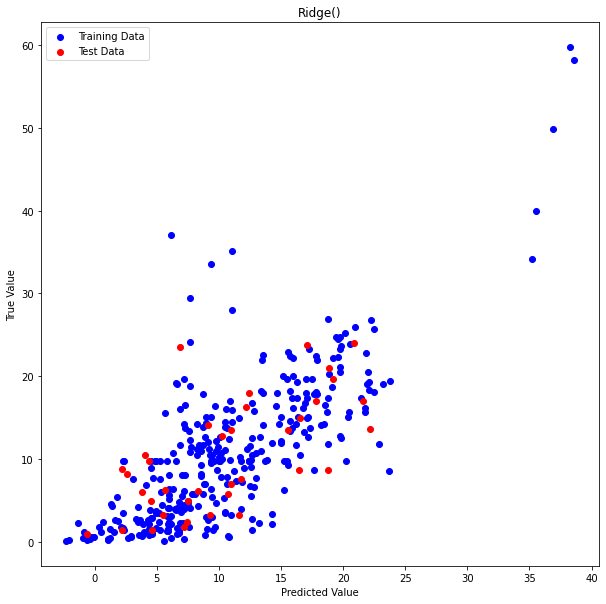

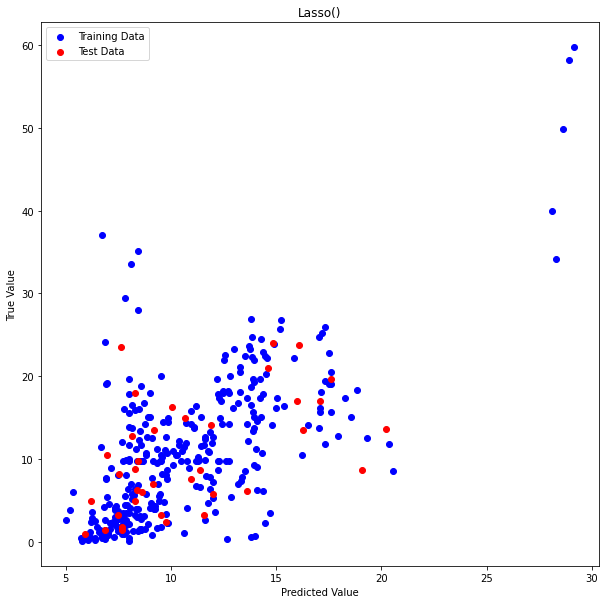

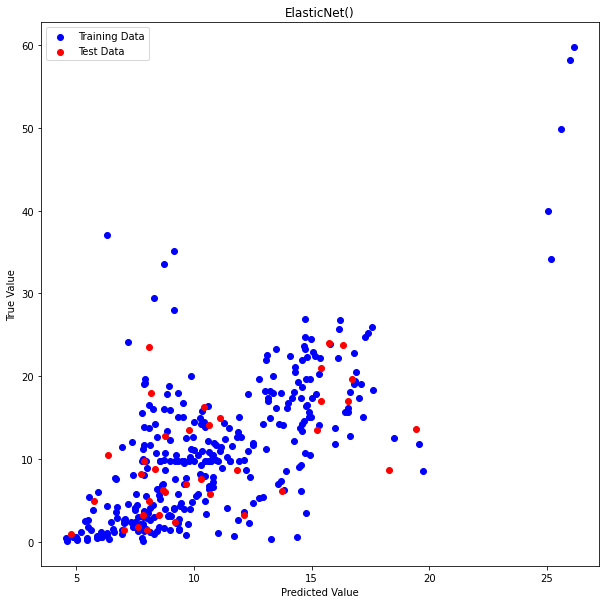

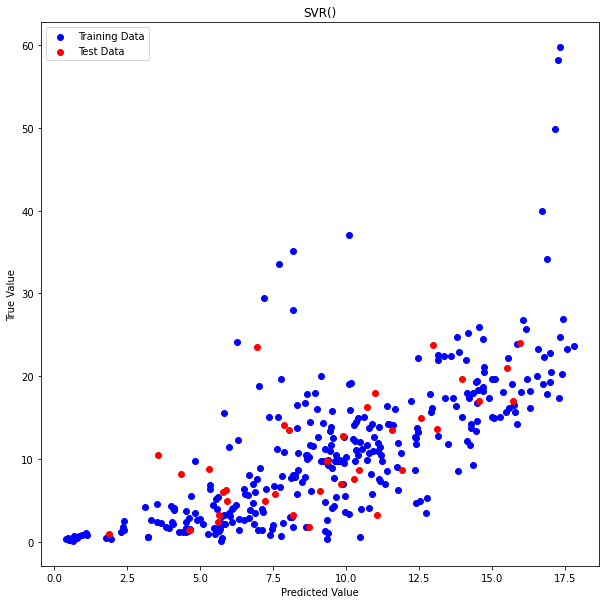

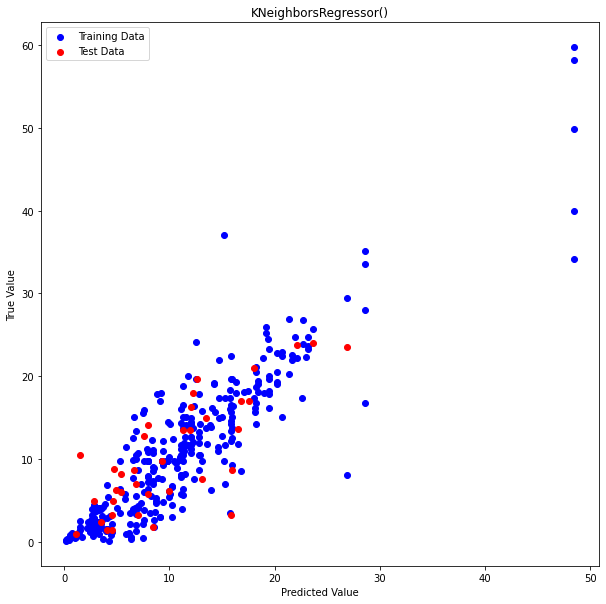

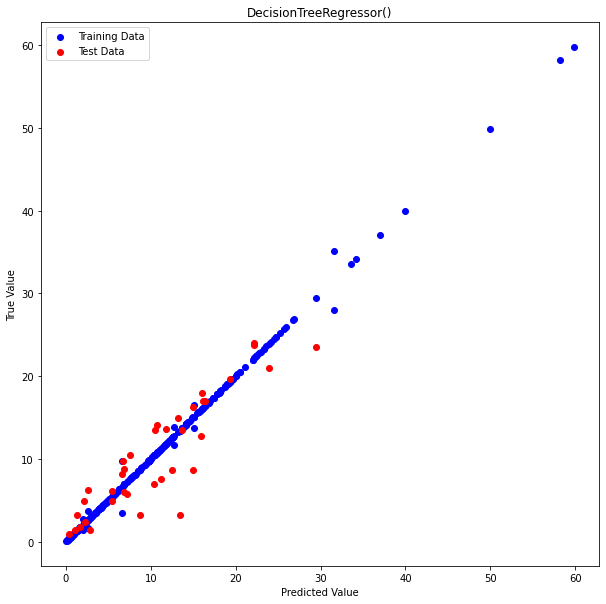

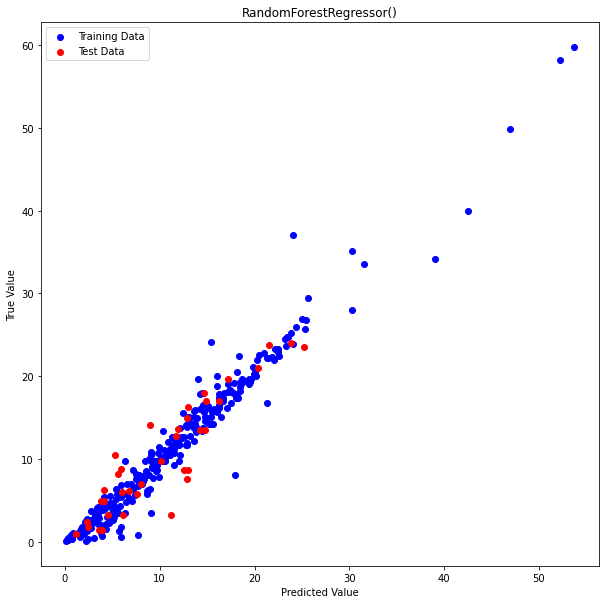

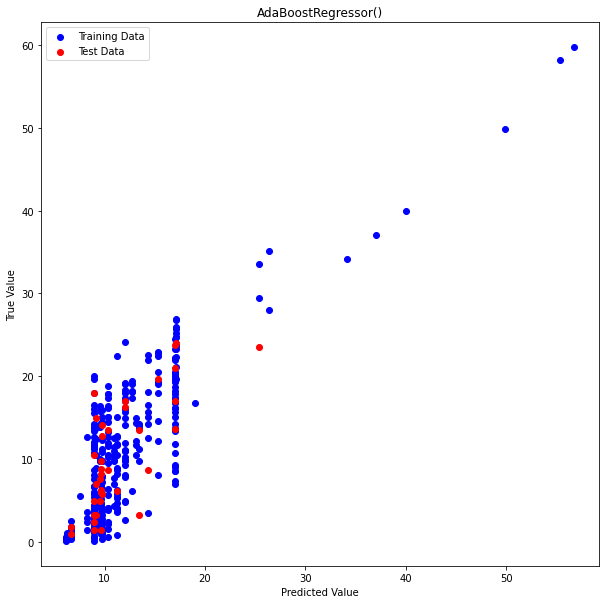

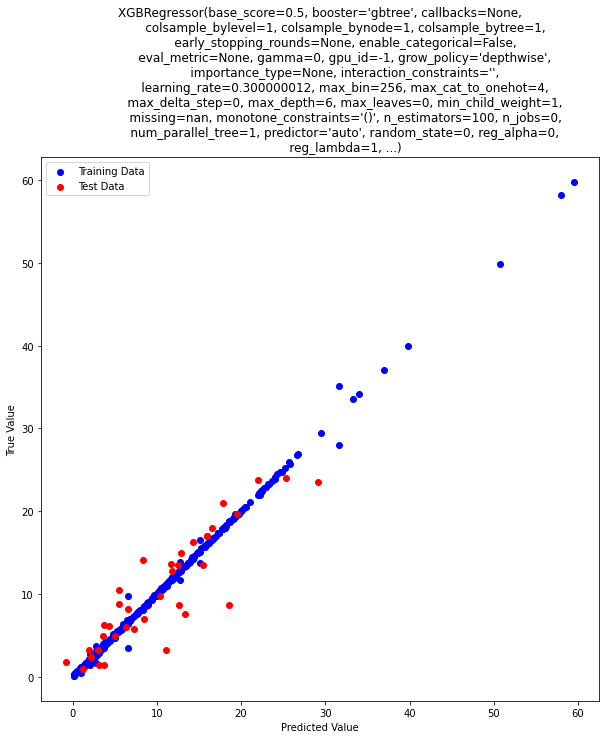

In [69]:
def compare_models():
    result=[]
    for model in models:
        model.fit(X_train,Y_train)
        Y_pred_train=model.predict(X_train)
        Y_pred_test=model.predict(X_test)
        plt.figure(figsize=(10,10))
        plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
        plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
        plt.xlabel('Predicted Value')
        plt.ylabel('True Value')
        plt.legend()
        plt.title(model)
        
        training_mse=(mean_squared_error(Y_train,Y_pred_train))
        test_mse=(mean_squared_error(Y_test,Y_pred_test))
        training_mae=mean_absolute_error(Y_train,Y_pred_train)
        test_mae=mean_absolute_error(Y_test,Y_pred_test)
        training_r2_score=r2_score(Y_train,Y_pred_train)
        test_r2_score=r2_score(Y_test,Y_pred_test)
        
        result.append({'Model':model,
                       'Training MSE':training_mse,'Training MAE':training_mae,'Training r2_score':training_r2_score,
                       'Test MSE':test_mse,'Test MAE':test_mae,'Test r2_score':test_r2_score})
    result_dataframe=pd.DataFrame(result,columns=['Model','Training MSE','Test MSE','Training MAE','Test MAE','Training r2_score','Test r2_score'])
    return result_dataframe
ML_models_accuracy=compare_models()
ML_models_accuracy

# CROSS VALIDATION

In [70]:
models=[Ridge(), Lasso(), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), AdaBoostRegressor(), XGBRegressor()]
result=[]
def compare_models_cross_validation():
    for model in models:
        cv_score=cross_val_score(model,X,Y,cv=40)
        mean_accuracy=sum(cv_score)/len(cv_score)
        result.append({'Model':model,'Mean Accuracy':mean_accuracy})
    result_dataframe=pd.DataFrame(result,columns=['Model','Mean Accuracy'])
    return result_dataframe
ML_models_cross_val_score=compare_models_cross_validation()
ML_models_cross_val_score

,Model,Mean Accuracy
0,Ridge(),-9.791377
1,Lasso(),-4.831889
2,ElasticNet(),-4.612509
3,SVR(),-8.071437
4,KNeighborsRegressor(),-8.826140
5,DecisionTreeRegressor(),-5.431407
6,RandomForestRegressor(),-2.852272
7,AdaBoostRegressor(),-5.239815
8,"XGBRegressor(base_score=None, booster=None, ca...",-3.336350


# Hypertuning of Parameters

In [71]:
from sklearn.model_selection import GridSearchCV

Ridge_Regressor

Training MSE: 32.999618977904845
Test MSE: 29.603588241832288

Training MAE: 4.1361066461847775
Test MAE: 4.395544588832047

Training r2_score: 0.5784356123513213
Test r2_score: 0.354726030839021
{'alpha': 0.1, 'max_iter': 250}


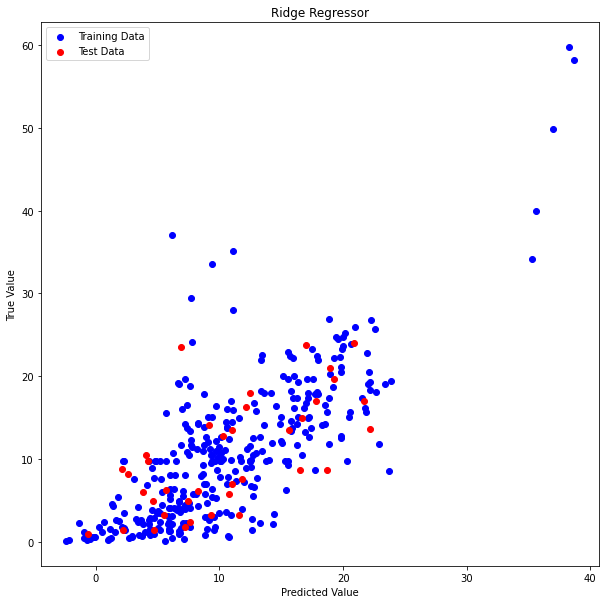

In [72]:
#Ridge Regressor
Ridge_regressor = Ridge(tol=0.001)
ridge_hyperparameters={'alpha':[0.01,0.1,0.001], 'max_iter':[250,150,500]}
Ridge_tuning=GridSearchCV(Ridge_regressor,ridge_hyperparameters,refit=True)
Ridge_tuning.fit(X_train, Y_train)

Y_pred_train = Ridge_tuning.predict(X_train)
Y_pred_test = Ridge_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Ridge Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Ridge_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(Ridge_tuning.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.886e+02, tolerance: 1.992e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.653e+01, tolerance: 2.142e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.801e+02, tolerance: 2.101e

Lasso_Regressor

Training MSE: 34.060895964283944
Test MSE: 28.93224886295961

Training MAE: 4.156791397999098
Test MAE: 4.399138533826783

Training r2_score: 0.5648779836045138
Test r2_score: 0.36935931860536997
{'alpha': 0.1, 'max_iter': 500}


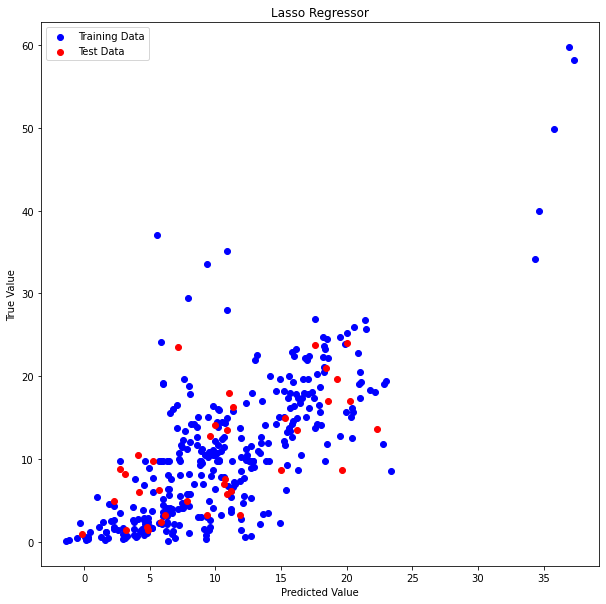

In [73]:
#Lasso Regressor
Lasso_regressor = Lasso(tol=0.0001)
lasso_hyperparameters={'alpha':[0.001,0.01,0.1,1],'max_iter':[500,200,1000]}
Lasso_tuning=GridSearchCV(Lasso_regressor,lasso_hyperparameters,refit=True)
Lasso_tuning.fit(X_train, Y_train)

Y_pred_train = Lasso_tuning.predict(X_train)
Y_pred_test = Lasso_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Lasso Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Lasso_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(Lasso_tuning.best_params_)

Elastic_Net_Regressor

Training MSE: 34.115472802271
Test MSE: 28.111080025066276

Training MAE: 4.138273777707316
Test MAE: 4.308803850804551

Training r2_score: 0.5641807740003295
Test r2_score: 0.38725846215006976
{'alpha': 0.1, 'max_iter': 750}


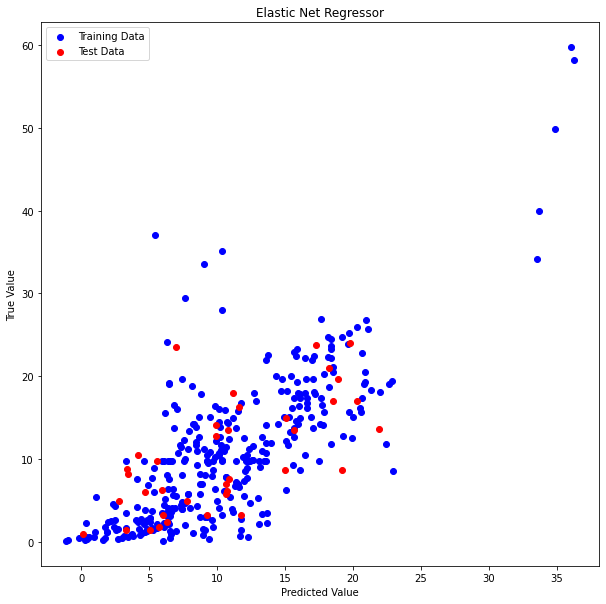

In [74]:
# Elastic Net Regressor
EN_regressor = ElasticNet(tol=0.0001)
elasticnet_hyperparameters={'alpha':[0.001,0.01,0.1,1],'max_iter':[750,500,1000]}
EN_tuning=GridSearchCV(EN_regressor,elasticnet_hyperparameters)#,refit=True)
EN_tuning.fit(X_train, Y_train) 

Y_pred_train = EN_tuning.predict(X_train)
Y_pred_test = EN_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Elastic Net Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Elastic_Net_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(EN_tuning.best_params_)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Support Vector_Regressor

Training MSE: 38.84983313764953
Test MSE: 27.43381403390277

Training MAE: 3.7653420617563147
Test MAE: 3.7972261569512935

Training r2_score: 0.5037001449049339
Test r2_score: 0.40202093319668
{'epsilon': 0.5, 'kernel': 'linear', 'max_iter': 5000}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


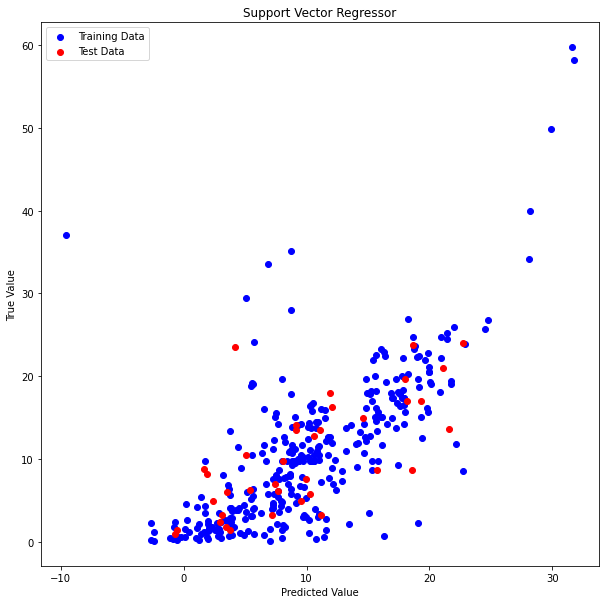

In [75]:
#SVM Regressor
SV_regressor = SVR(gamma='scale',tol=0.001, C=1.0)
svr_hyperparameters={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'max_iter':[4000,5000,6000],'epsilon':[0.01,0.1,0.2,0.5]}
SVR_tuning=GridSearchCV(SV_regressor,svr_hyperparameters,refit=True)
SVR_tuning.fit(X_train, Y_train) 

Y_pred_train = SVR_tuning.predict(X_train)
Y_pred_test = SVR_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Support Vector Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Support Vector_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(SVR_tuning.best_params_)

KNN_Regressor

Training MSE: 6.248722734138973
Test MSE: 13.479725675675674

Training MAE: 1.5727643504531723
Test MAE: 2.457297297297297

Training r2_score: 0.9201736548907595
Test r2_score: 0.7061803447984305
{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}


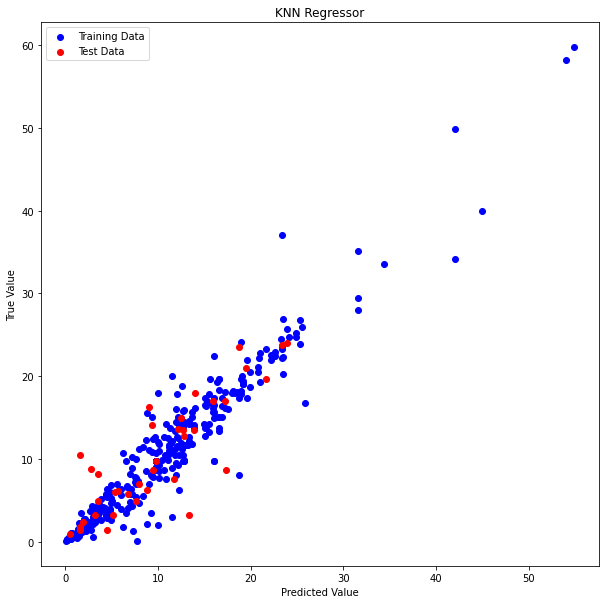

In [76]:
#KNN Regressor
KNN_regressor = KNeighborsRegressor(weights='uniform', algorithm='auto')
knr_hyperparameters={'p':[1,2],'n_neighbors':[2,4,6,8,10],'leaf_size':[2,4,6,8]}
KNN_tuning=GridSearchCV(KNN_regressor,knr_hyperparameters,refit=True)
KNN_tuning.fit(X_train, Y_train) 

Y_pred_train = KNN_tuning.predict(X_train)
Y_pred_test = KNN_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('KNN Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('KNN_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(KNN_tuning.best_params_)

Random Forest_Regressor

Training MSE: 4.543351212643045
Test MSE: 7.242877895061168

Training MAE: 1.36513127002481
Test MAE: 2.004108365491405

Training r2_score: 0.9419594791954065
Test r2_score: 0.8421258757784571
{'max_depth': 16, 'max_leaf_nodes': 80, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 120}


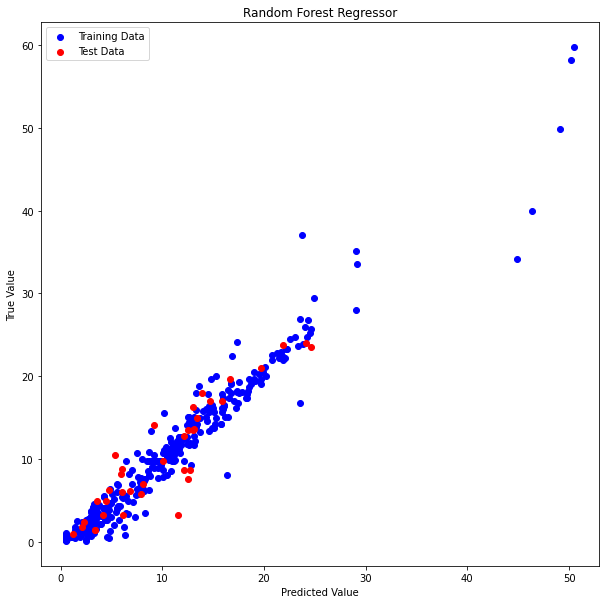

In [77]:
#Random Forest Regressor
RFR_regressor = RandomForestRegressor(random_state = 0,max_features='auto')
rfr_hyperparameters={'n_estimators':[40,60,80,100,120],
                       'min_samples_split':[2,4,6,8],
                        'min_samples_leaf':[1,2],
                        'max_leaf_nodes':[40,60,80],
                        'max_depth':[10,12,14,16]}
RFR_tuning=GridSearchCV(RFR_regressor,rfr_hyperparameters,refit=True)
RFR_tuning.fit(X_train, Y_train) 

Y_pred_train = RFR_tuning.predict(X_train)
Y_pred_test = RFR_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Random Forest Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('Random Forest_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(RFR_tuning.best_params_)

AdaBoost_Regressor

Training MSE: 27.818350968221957
Test MSE: 22.572372081412862

Training MAE: 4.554234377061937
Test MAE: 4.080371364254808

Training r2_score: 0.6446254091852827
Test r2_score: 0.5079865316539669
{'loss': 'exponential', 'n_estimators': 60}


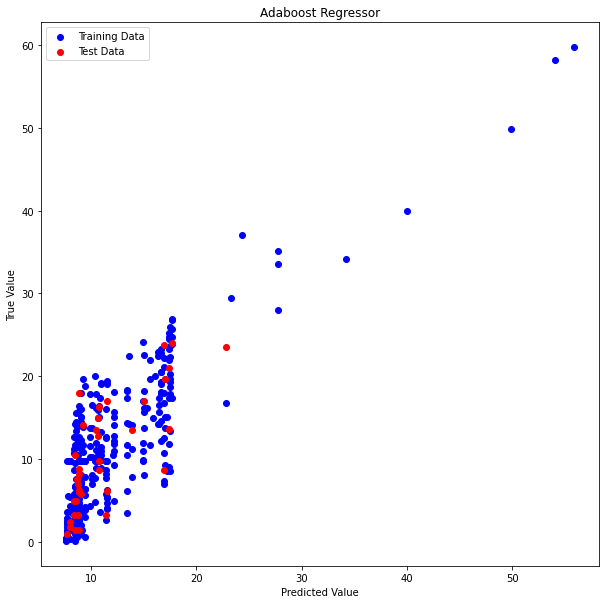

In [78]:
#Adaboost Regressor
Adab_regressor = AdaBoostRegressor()
adab_hyperparameters={'n_estimators':[120,60,80,100],'loss':['linear', 'square', 'exponential']}
Adab_tuning=GridSearchCV(Adab_regressor,adab_hyperparameters,refit=True)
Adab_tuning.fit(X_train, Y_train) 

Y_pred_train = Adab_tuning.predict(X_train)
Y_pred_test = Adab_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('Adaboost Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('AdaBoost_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(Adab_tuning.best_params_)

XGBoost_Regressor

Training MSE: 0.8791931661101567
Test MSE: 7.299363086613764

Training MAE: 0.6181485276378894
Test MAE: 1.9721666003562308

Training r2_score: 0.9887684603587606
Test r2_score: 0.8408946593646152
{'learning_rate': 0.1, 'max_depth': 6, 'sampling_method': 'uniform'}


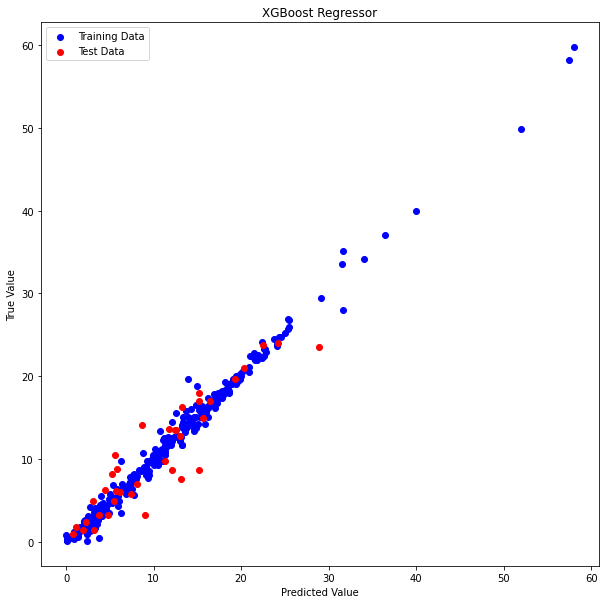

In [79]:
#XGBoost Regressor
XGB_regressor = XGBRegressor()
XGB_hyperparameters={'sampling_method':['uniform','gradient_based'],'max_depth':[6,8,10],'learning_rate':[0.01,0.1,0.3]}
XGB_tuning=GridSearchCV(XGB_regressor,XGB_hyperparameters,refit=True)
XGB_tuning.fit(X_train, Y_train) 

Y_pred_train = XGB_tuning.predict(X_train)
Y_pred_test = XGB_tuning.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_pred_train,Y_train,color='blue',label='Training Data')
plt.scatter(Y_pred_test,Y_test,color='red',label='Test Data')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.legend()
plt.title('XGBoost Regressor')

training_mse=mean_squared_error(Y_train,Y_pred_train)
test_mse=mean_squared_error(Y_test,Y_pred_test)
training_mae=mean_absolute_error(Y_train,Y_pred_train)
test_mae=mean_absolute_error(Y_test,Y_pred_test)
training_r2_score=r2_score(Y_train,Y_pred_train)
test_r2_score=r2_score(Y_test,Y_pred_test)

print('XGBoost_Regressor')
print('\nTraining MSE:',training_mse)
print('Test MSE:',test_mse)
print('\nTraining MAE:',training_mae)  
print('Test MAE:',test_mae)
print('\nTraining r2_score:',training_r2_score)                       
print('Test r2_score:',test_r2_score)
     
print(XGB_tuning.best_params_)